In [1]:
#import nltk
#nltk.download()

In [2]:
import sys
import nltk
import sklearn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [3]:
# Laod the dataset of sms messages
df= pd.read_table('C:/Users/Sandip EUR0788/Downloads/SMSSpamCollection',header = None , encoding = 'utf-8')
df.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# Print Useful information about the data set.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       5572 non-null   object
 1   1       5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [5]:
# How many rows and columns are in this dataset
df.shape

(5572, 2)

In [6]:
# Check class distribution
classes = df[0]
print(classes.value_counts())

ham     4825
spam     747
Name: 0, dtype: int64


# Data Preprocessing

In [7]:
# Convert class labels to binary values , 0 = ham , 1 = spam 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
Y = encoder.fit_transform(classes)
print(classes[:10])
print(Y[:10])

0     ham
1     ham
2    spam
3     ham
4     ham
5    spam
6     ham
7     ham
8    spam
9    spam
Name: 0, dtype: object
[0 0 1 0 0 1 0 0 1 1]


In [8]:
# Store the sms text messages of data 

text_messages = df[1]
print(text_messages[:10])

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
6    Even my brother is not like to speak with me. ...
7    As per your request 'Melle Melle (Oru Minnamin...
8    WINNER!! As a valued network customer you have...
9    Had your mobile 11 months or more? U R entitle...
Name: 1, dtype: object


In [9]:
# Use regular expressions to replace email addresses , urls , phone numbers , other numbers , symbols.
# replace email addresses with 'emailaddr'
processed = text_messages.str.replace(r'^\w+@[a-zA-Z_]+?\.[a-zA-Z]{2,}$','emailaddr')

# replace urls with webaddress.
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# replace money symbols with 'moneysymbs'
processed = processed.str.replace(r'£|\$','moneysymb')

# Replace 10 digit Phone Numbers with Phonenumber
processed = processed.str.replace(r'^\(?[d]{3}\)?[\d](3)[\s-]?[\d]{4}$','phonenum')

# replace normal numbers with 'numbr'
processed = processed.str.replace(r'\d+(\.\d+)?', 'number')


In [10]:
# Remove Punctuation 
processed = processed.str.replace(r'[^\w\d\s]',' ')

# Replace whitespace between terms with a single space

processed = processed.str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace

processed = processed.str.replace(r'^\s+|\s+?$', '')

In [11]:
# Change words to lower case  - Hello , HELLO , hello are the same words.
processed = processed.str.lower()
print(processed)

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in number a wkly comp to win fa cup...
3             u dun say so early hor u c already then say
4       nah i don t think he goes to usf he lives arou...
                              ...                        
5567    this is the numbernd time we have tried number...
5568                  will ü b going to esplanade fr home
5569    pity was in mood for that so any other suggest...
5570    the guy did some bitching but i acted like i d...
5571                            rofl its true to its name
Name: 1, Length: 5572, dtype: object


In [12]:
# Remove stop words from the text messages 

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
processed = processed.apply(lambda x: ' '.join(term for term in x .split() if term not in stop_words))

In [13]:
 # Remove word stem using a Porter stemmer

ps = nltk.PorterStemmer()
processed = processed.apply(lambda x: ' '.join(ps.stem(term) for term in x.split()))

In [14]:
processed

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri number wkli comp win fa cup final t...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    numbernd time tri number contact u u moneysymb...
5568                              ü b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: 1, Length: 5572, dtype: object

In [15]:
from nltk.tokenize import word_tokenize

# creating a bag-of-words

all_words = []

for message in processed :
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        
all_words = nltk.FreqDist(all_words)

In [16]:
# print the total number words and the is most common words
print('Number of words: {}', format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))

Number of words: {} 6579
Most common words: [('number', 2759), ('u', 1207), ('call', 674), ('go', 456), ('get', 452), ('ur', 391), ('gt', 318), ('lt', 316), ('come', 304), ('moneysymbnumb', 303), ('ok', 293), ('free', 284), ('day', 276), ('know', 275), ('love', 266)]


In [17]:
# Use the 1500 most common words as features
word_features = list(all_words.keys())[:1500]

In [18]:
# Define a find_features function 

def find_features(messages):
    words = word_tokenize(message)
    features = {}
    for word in word_features:
        features[word] = (word in words)
        
    return features

# Let see an example 

features = find_features(processed[0])
for key, value in features.items():
    if value == True:
        print(key)

name
true


In [19]:
features

{'go': False,
 'jurong': False,
 'point': False,
 'crazi': False,
 'avail': False,
 'bugi': False,
 'n': False,
 'great': False,
 'world': False,
 'la': False,
 'e': False,
 'buffet': False,
 'cine': False,
 'got': False,
 'amor': False,
 'wat': False,
 'ok': False,
 'lar': False,
 'joke': False,
 'wif': False,
 'u': False,
 'oni': False,
 'free': False,
 'entri': False,
 'number': False,
 'wkli': False,
 'comp': False,
 'win': False,
 'fa': False,
 'cup': False,
 'final': False,
 'tkt': False,
 'numberst': False,
 'may': False,
 'text': False,
 'receiv': False,
 'question': False,
 'std': False,
 'txt': False,
 'rate': False,
 'c': False,
 'appli': False,
 'numberovernumb': False,
 'dun': False,
 'say': False,
 'earli': False,
 'hor': False,
 'alreadi': False,
 'nah': False,
 'think': False,
 'goe': False,
 'usf': False,
 'live': False,
 'around': False,
 'though': False,
 'freemsg': False,
 'hey': False,
 'darl': False,
 'week': False,
 'word': False,
 'back': False,
 'like': False,


In [20]:
# find the features for all messages 
messages = list(zip(processed,Y))

# Define a seed for reproducibility

seed = 1
np.random.seed = seed 
np.random.shuffle(messages)

# call find_features function for each SMS messages 

featuresets = [(find_features(text), label ) for (text,label) in messages]

In [21]:
# split training and testing data sets using sklearn
from sklearn import model_selection
training , testing = model_selection.train_test_split(featuresets,test_size = 0.25 , random_state = seed)


In [22]:
print('Traning : {}'.format(len(training)))
print('Testing : {}'.format(len(testing)))

Traning : 4179
Testing : 1393


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression , SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

In [28]:
# Define model to train
names = { 'K Nearest Neighbors' , 'Decision Tree', 'Random Forest', 'Logistic Regression','SGD Classifier','Naive Bayes','SVM Linear'}
classifiers = {
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
}
models = zip(names, classifiers)

In [27]:
# wrap models to NLTK

from nltk.classify.scikitlearn import SklearnClassifier

for name, model in models:
    nltk_model = SklearnClassifier(model)
    nltk_model.train(training)
    accuracy = nltk.classify.accuracy(nltk_model,testing)*100
    print('{}:Accuracy:{}'.format(name, accuracy))

K Nearest Neighbors:Accuracy:85.78607322325915
Decision Tree:Accuracy:85.78607322325915
Random Forest:Accuracy:85.78607322325915
Logistic Regression:Accuracy:85.78607322325915
SGD Classifier:Accuracy:85.78607322325915
Naive Bayes:Accuracy:85.78607322325915
SVM Linear:Accuracy:85.78607322325915


In [26]:
# ensemble method - Voting classifier

from sklearn.ensemble import VotingClassifier

# Define models to train

names = ['K Nearest Neighbors', 'Decision Tree','Random Forest','Logistic Regression','SGD Classifier', 
         'Naive Bayes', 'SVM Linear']


classifiers = [
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    SGDClassifier(max_iter = 100),
    MultinomialNB(),
    SVC(kernel = 'linear')
]

models = list(zip(names, classifiers))

nltk_ensemble = SklearnClassifier(VotingClassifier(estimators = models, voting = 'hard',n_jobs = -1))
nltk_ensemble.train(training)
accuracy = nltk.classify.accuracy(nltk_ensemble,testing)*100
print('Ensemble Method Accuracy: {}'.format(accuracy))

Ensemble Method Accuracy: 85.78607322325915


In [29]:
# Make class tabel prediction for testing set

txt_features , labels = zip(*testing)

prediction = nltk_ensemble.classify_many(txt_features)

In [32]:
# print a confusion matrix and a classification report 

cm = pd.DataFrame(
    confusion_matrix(labels, prediction),
    index = [['actual','actual'],['ham','spam']],
    columns = [['predicted','predicted'],['ham','spam']]
    
)

print(cm)

            predicted     
                  ham spam
actual ham       1195    0
       spam       198    0


Text(33.222222222222214, 0.5, 'ACTUAL VALUE')

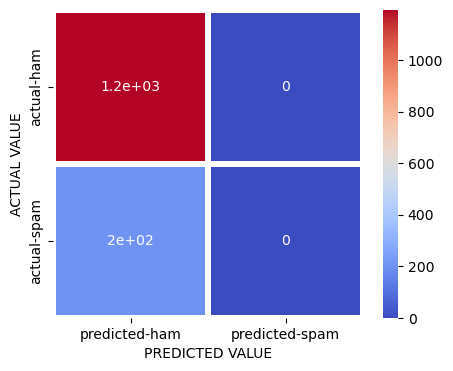

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (5,4))
sns.heatmap(cm, annot = True , cmap = 'coolwarm' , linewidth= 4)
plt.xlabel('PREDICTED VALUE')
plt.ylabel('ACTUAL VALUE')
